In [1]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

Using TensorFlow backend.
2022-04-09 22:20:51.312103: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-09 22:20:51.316751: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-09 22:20:51.316779: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (KIM-VM): /proc/driver/nvidia/version does not exist
2022-04-09 22:20:51.317115: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2022-04-09 22:20:51.335236: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3176220000 Hz
2022-04-09 22:20:51.337049: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f779c000e10 initialized for platform Host (this does 

In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1677 - accuracy: 0.9465
Epoch 2/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0465 - accuracy: 0.9858
Epoch 3/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0332 - accuracy: 0.9897
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0244 - accuracy: 0.9926
Epoch 5/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0203 - accuracy: 0.9939
Epoch 6/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 7/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 8/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 9/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0092 - accuracy: 0.9971
Epoch 10/10
60000/60000 [==============================

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 4s 370us/step


0.9922000169754028

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


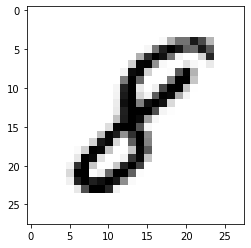

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777 
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

In [7]:
import random

image_index = random.randint(0, 9999)

3


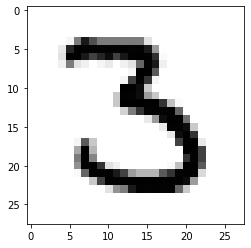

In [8]:
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

170500096/170498071 [==============================] - 5s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


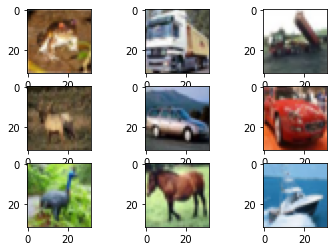

In [9]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [11]:
from keras import optimizers

model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr = 1e-4),
              metrics=['accuracy'])

In [12]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [14]:
import time
start = time.time()
history = model.fit(x_train_norm, y_train,
            batch_size=50,
            epochs=10,
            verbose=1,
            validation_split= 0.2)

end = time.time()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 92s 2ms/step - loss: 1.9541 - accuracy: 0.2839 - val_loss: 1.7365 - val_accuracy: 0.3767
Epoch 2/10
40000/40000 [==============================] - 96s 2ms/step - loss: 1.6680 - accuracy: 0.3933 - val_loss: 1.5851 - val_accuracy: 0.4218
Epoch 3/10
40000/40000 [==============================] - 84s 2ms/step - loss: 1.5418 - accuracy: 0.4410 - val_loss: 1.4905 - val_accuracy: 0.4596
Epoch 4/10
40000/40000 [==============================] - 90s 2ms/step - loss: 1.4488 - accuracy: 0.4793 - val_loss: 1.4154 - val_accuracy: 0.4857
Epoch 5/10
40000/40000 [==============================] - 89s 2ms/step - loss: 1.3751 - accuracy: 0.5088 - val_loss: 1.3472 - val_accuracy: 0.5217
Epoch 6/10
40000/40000 [==============================] - 89s 2ms/step - loss: 1.3158 - accuracy: 0.5321 - val_loss: 1.3124 - val_accuracy: 0.5268
Epoch 7/10
40000/40000 [==============================] - 85s 2ms/st

In [15]:
import matplotlib.pyplot as plt

def plot_model_history(model):
    # Visualize history
    # Plot history: Loss
    plt.plot(history.history['val_loss'])
    plt.title('Validation loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.show()

    # Plot history: Accuracy
    plt.plot(history.history['val_accuracy'])
    plt.title('Validation accuracy history')
    plt.ylabel('Accuracy value (%)')
    plt.xlabel('No. epoch')
    plt.show()

Model took 892.97 seconds to train
Test loss: 1.1440258535385133 / Test accuracy: 0.6015999913215637


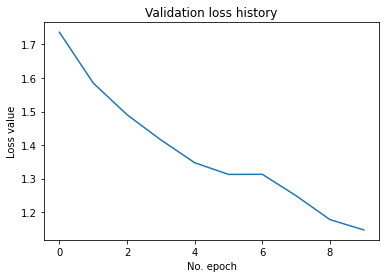

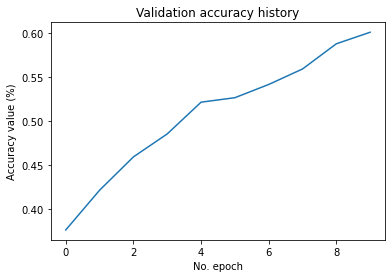

In [16]:
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
score = model.evaluate(x_test_norm, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
plot_model_history(history)

In [17]:
from keras.preprocessing.image import ImageDataGenerator
import time
import numpy as np

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Flatten())

model.summary()

ValueError: Input 0 is incompatible with layer flatten_4: expected min_ndim=3, found ndim=2

In [ ]:
model.compile(loss= 'binary_crossentropy',
              optimizer=optimizers.RMSprop(lr = 1e-4),
              metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40, 
        width_shift_range = .2, 
        height_shift_range = .2, 
        shear_range = .2,
        zoom_range = .2, 
        horizontal_flip = True)

In [ ]:
def plot_model_history(model):
    # Visualize history
    # Plot history: Loss
    plt.plot(history.history['val_loss'])
    plt.title('Validation loss history')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    plt.show()

    # Plot history: Accuracy
    plt.plot(history.history['val_accuracy'])
    plt.title('Validation accuracy history')
    plt.ylabel('Accuracy value (%)')
    plt.xlabel('No. epoch')
    plt.show()

In [ ]:
start = time.time()
# Train the model
model_info = model.fit(datagen.flow(x_train_norm, y_train, batch_size = 128),
                                 steps_per_epoch = 100, epochs = 10, 
                                 validation_data = (x_test_norm, y_test), verbose=0)
end = time.time()


In [ ]:
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
score = model.evaluate(x_test_norm, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
plot_model_history(model_info)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

def image_check(img):
    img = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    pyplot.imshow(img)
    return print('Predicted:', decode_predictions(preds, top=3)[0])

img_list = ['couch.jpeg', 'lion.jpeg', 'peacock.jpeg', 'pizza.jpeg', 'punching bag.jpeg', 'rabbit.jpeg', 'skateboard.jpeg', 'squirrel.jpeg']

In [ ]:
image_check('couch.jpeg')

In [ ]:
image_check('lion.jpeg')

In [ ]:
image_check('peacock.jpeg')

In [ ]:
image_check('pizza.jpeg')

In [ ]:
image_check('punching bag.jpeg')

In [ ]:
image_check('rabbit.jpeg')

In [ ]:
image_check('skateboard.jpeg')

In [ ]:
image_check('squirrel.jpeg')